In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive')


rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|
it: 0
it: 2000
it: 4000
it: 6000
it: 8000


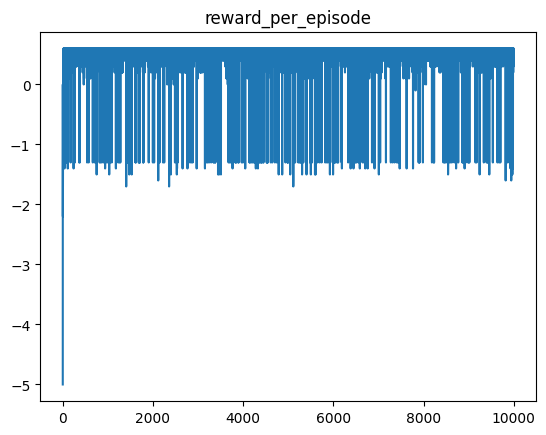

update counts:
---------------------------
 0.01| 0.01| 0.19| 0.00|
---------------------------
 0.01| 0.00| 0.19| 0.00|
---------------------------
 0.20| 0.20| 0.20| 0.01|
values:
---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.46|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |


In [ ]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
from iterative_policy_evaluation import print_values, print_policy
from monte_carlo_es import max_dict

GAMMA = 0.9
ALPHA = 0.1
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')


def epsilon_greedy(Q, s, eps=0.1):
  if np.random.random() < eps:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)
  else:
    a_opt = max_dict(Q[s])[0]
    return a_opt


if __name__ == '__main__':
  # grid = standard_grid()
  grid = negative_grid(step_cost=-0.1)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # initialize Q(s,a)
  Q = {}
  states = grid.all_states()
  for s in states:
    Q[s] = {}
    for a in ALL_POSSIBLE_ACTIONS:
      Q[s][a] = 0

  # let's also keep track of how many times Q[s] has been updated
  update_counts = {}

  # repeat until convergence
  reward_per_episode = []
  for it in range(10000):
    if it % 2000 == 0:
      print("it:", it)

    # begin a new episode
    s = grid.reset()
    episode_reward = 0
    while not grid.game_over():
      # perform action and get next state + reward
      a = epsilon_greedy(Q, s, eps=0.1)
      r = grid.move(a)
      s2 = grid.current_state()

      # update reward
      episode_reward += r

      # update Q(s,a)
      maxQ = max_dict(Q[s2])[1]
      Q[s][a] = Q[s][a] + ALPHA*(r + GAMMA*maxQ - Q[s][a])

      # we would like to know how often Q(s) has been updated too
      update_counts[s] = update_counts.get(s,0) + 1

      # next state becomes current state
      s = s2

    # log the reward for this episode
    reward_per_episode.append(episode_reward)

  plt.plot(reward_per_episode)
  plt.title("reward_per_episode")
  plt.show()

  # determine the policy from Q*
  # find V* from Q*
  policy = {}
  V = {}
  for s in grid.actions.keys():
    a, max_q = max_dict(Q[s])
    policy[s] = a
    V[s] = max_q

  # what's the proportion of time we spend updating each part of Q?
  print("update counts:")
  total = np.sum(list(update_counts.values()))
  for k, v in update_counts.items():
    update_counts[k] = float(v) / total
  print_values(update_counts, grid)

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)
